# Project2 Part 5

### Part 1

In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

In [3]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='all', categories=None, shuffle=True, random_state=42)

In [4]:
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words_en = stopwords.words('english')
from string import punctuation
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
print len(combined_stopwords)

410


In [5]:
from nltk import pos_tag
#nltk.download()

In [6]:
# overwrite analyzer with callable function:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
def rmv_punc(doc):
    return (word for word in analyzer(doc) if word not in combined_stopwords and not word.isdigit())

In [7]:
count_vect = CountVectorizer(min_df=3,analyzer=rmv_punc)
# count_vect = CountVectorizer(min_df=5,analyzer=stem_rmv_punc)
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape # 4732 docs

(18846, 48401)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print X_train_tfidf.shape


(18846, 48401)


## part 2

In [15]:
from sklearn.cluster import KMeans




In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import v_measure_score

labels = twenty_train.target
clf = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_tfidf)
print("Homogeneity: %0.3f" % homogeneity_score(labels, clf.labels_))
print("Completeness: %0.3f" % completeness_score(labels, clf.labels_))
print("V-measure: %0.3f" % v_measure_score(labels, clf.labels_))
print("Adjusted_Mutual_info_score: %0.3f" % adjusted_mutual_info_score(labels, clf.labels_))
print("Adjusted Rand-Index: %.3f"
      % adjusted_rand_score(labels, clf.labels_))
print  'confusion matrix:' 
print   confusion_matrix(labels, clf.labels_)
  

Homogeneity: 0.348
Completeness: 0.430
V-measure: 0.385
Adjusted_Mutual_info_score: 0.346
Adjusted Rand-Index: 0.126
confusion matrix:
[[  1  13   0  41  15 225   0   0   0   1   0   0   0   0 136  89   0  70
  142  66]
 [ 16   9  66   0   2 406   4  34   0   0   0   0   0   0   1   1 260  74
    1  99]
 [  6  11  93   0   6 246   2 471   0   0   0   0   9   0   2   0  52  31
    0  56]
 [  7  29 208   0   6 310  16  48   0   0   0   0 182   0   0   0  11  25
    0 140]
 [ 11  32 114   0  18 566  12   8   0   0   0   0  68   0   1   0   8  21
    0 104]
 [ 23   6   6   0  21 169   1  58   0   2   0   0   0   0   0   0 556  66
    0  80]
 [  3  46  25   0  15 200 542  10   0   0   0   0  34   7   0   6   3   5
    0  79]
 [  8  50   0   0  18 326  14   2   0   0   0   0   0   0  20   3   2  25
    0 522]
 [ 18  17   0   0  12 263  13   0   0   0   0   0   0   0   2   0   0 103
    0 568]
 [  3   8   0   0   8 338   0   0   0   0   0   0   0 484   2   4   3   2
    0 142]
 [  3  11   0  

### Part 3

In [69]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

model = NMF(n_components=50, init='random', random_state=0)
X_train_nmf = model.fit_transform(X_train_tfidf)
X_train_nmf
svd = TruncatedSVD(n_components=50, n_iter=5, random_state=42)
X_train_lsi=svd.fit_transform(X_train_tfidf)
X_train_lsi

array([[ 0.11234362, -0.00789218, -0.1012898 , ..., -0.02644345,
         0.0155942 ,  0.01847738],
       [ 0.11319036, -0.09454901, -0.01746925, ...,  0.01379249,
        -0.04232891, -0.07955676],
       [ 0.11789877,  0.07013517,  0.018426  , ...,  0.00266132,
         0.02327813,  0.00833464],
       ..., 
       [ 0.06621068, -0.03496318,  0.05516372, ...,  0.01758016,
         0.00559195,  0.06087024],
       [ 0.10276402, -0.01896715, -0.01096283, ...,  0.04095135,
         0.01907324,  0.01280942],
       [ 0.13017923, -0.00748675,  0.05460407, ..., -0.0085226 ,
        -0.00135802,  0.03334262]])

In [9]:
vratio_list=[]
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1000, n_iter=5)
X_svd_tmp=svd.fit_transform(X_train_tfidf)
variance=svd.explained_variance_
rr=svd.explained_variance_ratio_
sum=0
for i in range(0,1000):
    sum+=rr[i]
    vratio_list.append(sum)

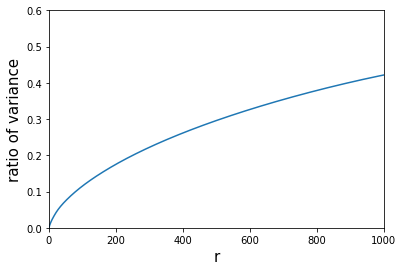

In [10]:
k=np.arange(1,1001,1)
plt.plot(k, vratio_list)
plt.axis([1,1000, 0, 0.6])
plt.xlabel('r',fontsize=15)
plt.ylabel('ratio of variance',fontsize=15)
plt.show()

In [103]:
from sklearn.decomposition import NMF
nmf_g = np.zeros([9,5])
def nmf_func(i,r):
    model_nmf = NMF(n_components=r, init='random', random_state=0)
    X_train_nmf = model_nmf.fit_transform(X_train_tfidf)
    clf = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_nmf)
    nmf_g[i,0]=homogeneity_score(labels, clf.labels_)
    nmf_g[i,1]=completeness_score(labels, clf.labels_)
    nmf_g[i,2]=v_measure_score(labels, clf.labels_)
    nmf_g[i,3]=adjusted_mutual_info_score(labels, clf.labels_)
    nmf_g[i,4]=adjusted_rand_score(labels, clf.labels_)
    print("Homogeneity: %0.3f" % nmf_g[i,0])
    print("Completeness: %0.3f" % nmf_g[i,1])
    print("V-measure: %0.3f" % nmf_g[i,2])
    print("Adjusted_Mutual_info_score: %0.3f" % nmf_g[i,3])
    print("Adjusted Rand-Index: %.3f"
      % nmf_g[i,4])labels
    print  'confusion matrix:' 
    print   confusion_matrix(labels, clf.labels_)
    print "_________________________________________"

In [104]:
from sklearn.decomposition import TruncatedSVD
SVD_g = np.zeros([9,5])
def lsi_func(i,r):
    svd = TruncatedSVD(n_components=r, n_iter=5, random_state=42)
    X_train_svd=svd.fit_transform(X_train_tfidf)
    clf = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_svd)
    SVD_g[i,0]=homogeneity_score(labels, clf.labels_)
    SVD_g[i,1]=completeness_score(labels, clf.labels_)
    SVD_g[i,2]=v_measure_score(labels, clf.labels_)
    SVD_g[i,3]=adjusted_mutual_info_score(labels, clf.labels_)
    SVD_g[i,4]=adjusted_rand_score(labels, clf.labels_)
    print("Homogeneity: %0.3f" % SVD_g[i,0])
    print("Completeness: %0.3f" % SVD_g[i,1])
    print("V-measure: %0.3f" % SVD_g[i,2])
    print("Adjusted_Mutual_info_score: %0.3f" % SVD_g[i,3])
    print("Adjusted Rand-Index: %.3f"
      % SVD_g[i,4])
    print  'confusion matrix:' 
    print   confusion_matrix(labels, clf.labels_)
    print "_________________________________________"
    

In [84]:
r = [1,2,3,5,10,20,50,100,300]

In [105]:
counter_0=0
for n in r:
    nmf_func(counter_0 ,n)
    counter_0+=1


Homogeneity: 0.028
Completeness: 0.030
V-measure: 0.029
Adjusted_Mutual_info_score: 0.024
Adjusted Rand-Index: 0.006
confusion matrix:
[[ 43  46  77  10  70  57   0  80   0  21  10  78  61  51  21  72  73  26
    3   0]
 [112   8  59  61  25  96   5  46  47 102   2  84  17 100   4  30  59  94
    0  22]
 [ 84  25  84  39  40  95   0  65  16  48   0 117  33  91  10  50 102  61
    1  24]
 [ 96  16  84  50  45  92   0  68  18  62   1 100  39  85   3  58  84  78
    0   3]
 [ 86  17  68  48  29  94   0  78  24  60   2  97  33 110   3  52  83  73
    3   3]
 [118   4  58 104  18  78   1  34  75 103   1  72  14  82   4  31  53 115
    6  17]
 [110   7  59  73  22  82   0  60  53 112   0  84  15 107   0  36  62  88
    1   4]
 [ 83  20  77  64  34 112   0  56  20  70   1 107  40  89   9  55  83  67
    1   2]
 [115   6  71  41  35 127   0  56  13  62   0 122  24 107   3  31  90  92
    0   1]
 [ 89  26  99  30  40 106   0  76  24  54   2  87  22  98   6  64  83  77
    0  11]
 [ 74  13  83  

Homogeneity: 0.303
Completeness: 0.383
V-measure: 0.338
Adjusted_Mutual_info_score: 0.300
Adjusted Rand-Index: 0.093
confusion matrix:
[[  5   0 162   0 150   1  71   1   0   0   0   0   1   0 136   0   2   0
   17 253]
 [ 44   2   1   0 213   2  78  16   0   2 296   0   0   0   0   0   1   0
    0 318]
 [ 44   0   0   0 110  13  35   2   0   2 634   0   0   0   0   0   0   7
    0 138]
 [ 55   3   0   0 170   5  28   8   0   3 205   2   0   0   0   0   0 186
    0 317]
 [ 57   3   0   0 377   1  24   9   0  13  70   0   0   0   0   0   0  72
    0 337]
 [ 21   0   0   0 141   2  85  26   0   2 372   0   4   0   0   0   0   0
    0 335]
 [ 37  69   0   0 427   8   5   4   0  32  50  14   0   0   0   0   3  50
    0 276]
 [ 34 543   0   0 136   1  21   8   0  27   3   0   0   0   0   0   3   0
    6 208]
 [118 272   0   0 150   1  83  16   0   5   0   0   0   0   0   0   0   0
    0 351]
 [ 46   0   0   0 310   1   3   4   0   7   0 403   0   0   0   0   4   0
    1 215]
 [189   0   0  

In [108]:
nmf_g.shape

(9, 5)

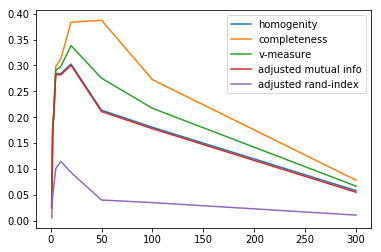

In [111]:
for c in range(0,5):
    plt.plot(r,nmf_g[:,c])
    
plt.legend(['homogenity','completeness','v-measure','adjusted mutual info', 'adjusted rand-index'])

#20

In [112]:
counter_1 = 0
for n in r:
    lsi_func(counter_1,n)
    counter_1 +=1

Homogeneity: 0.028
Completeness: 0.030
V-measure: 0.029
Adjusted_Mutual_info_score: 0.024
Adjusted Rand-Index: 0.006
confusion matrix:
[[ 67  42  56  81  12  21   2  52  81  62   0  20  11  45  70   0  29   0
   73  75]
 [ 26 118  15  83  62   4   3  96  53  97  47 105   2   8  26  22  98   2
   68  38]
 [ 41  87  27 123  39  10   1  93  83  94  17  48   0  24  44  24  65   0
  100  65]
 [ 53 103  36 105  50   3   0  82  80  91  18  64   1  16  42   3  82   0
   91  62]
 [ 40  91  32 104  49   3   3 108  68  95  24  60   2  17  28   3  74   0
   88  74]
 [ 33 117  14  76 106   4   7  83  56  76  75 110   1   4  14  17 113   0
   58  24]
 [ 31 118  14  82  77   0   1 100  56  84  53 111   0   7  20   4  92   0
   70  55]
 [ 50  88  40 107  65   9   1  92  77 111  20  75   1  19  31   2  67   0
   87  48]
 [ 30 110  23 120  42   3   0 112  76 129  13  63   0   6  34   1 101   0
   87  46]
 [ 55  90  22  92  31   6   0 110 102  95  24  54   2  26  33  11  79   0
   94  68]
 [ 43  76  16 1

Homogeneity: 0.291
Completeness: 0.388
V-measure: 0.333
Adjusted_Mutual_info_score: 0.289
Adjusted Rand-Index: 0.094
confusion matrix:
[[136   1   1   0   0   0   0   0   0   1  71   1  62   0  23 178 138   0
  149  38]
 [  5  17   1   0   0   0   0   0   0   0 145   2  95   2   7 473   0 225
    1   0]
 [  3   3   0  11   1   0   0   0   0   0  78  11  33   2  14 200   0 629
    0   0]
 [  0   9   0 199   4   0   0   0   0   0 215   4  32   3  30 319   0 167
    0   0]
 [  4  10   0  78   1   0   0   0   0   0 154   1  26  14  25 599   0  50
    0   1]
 [  0  28   0   0   0   0   0   0   0   4 207   1  95   2   4 337   0 310
    0   0]
 [  3   4   3  56  14   0   0   0   0   0 203   7   5  34  14 585   0  46
    0   1]
 [ 73  12   2   0   0   0   0   0   0   0 488   0  27  31  22 333   0   2
    0   0]
 [ 24  21   0   0   2   0   0   0   0   0 588   1 104   7   9 240   0   0
    0   0]
 [ 16   4   4   0 442   0   0   0   0   0 152   1   2   7   1 365   0   0
    0   0]
 [  1   3   0  

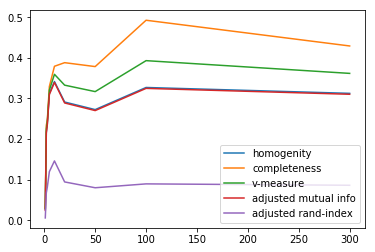

In [115]:
for c in range(0,5):
    plt.plot(r,SVD_g[:,c])
    
plt.legend(['homogenity','completeness','v-measure','adjusted mutual info', 'adjusted rand-index'])

#100

# 4

In [8]:
labels = twenty_train.target

In [9]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
model_nmf = NMF(n_components=20, init='random', random_state=0)
X_train_nmf = model_nmf.fit_transform(X_train_tfidf)
clf = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_nmf)
nmf_conf= confusion_matrix(labels, clf.labels_)
print nmf_conf

In [125]:
print clf.labels_.shape
X_train_nmf.shape

(18846,)


(18846, 20)

In [21]:
from sklearn.decomposition import PCA
X_nmf = X_train_nmf
pca = PCA(n_components=2).fit(X_nmf)
X_nmf_2d = pca.transform(X_nmf)

[11 10  8 ..., 19 19  1]


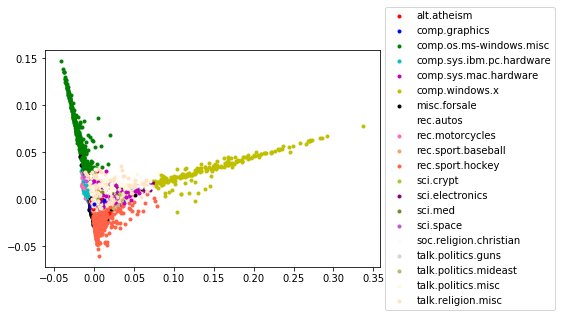

In [38]:
target_nmf = clf.labels_
print target_nmf
for n in range(0,18846):
    if target_nmf[n] == 0:
        c1 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='r',
    marker='.')
    elif target_nmf[n] == 1:
        c2 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='b',
    marker='.')
    elif target_nmf[n] == 2:
        c3 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='g',
    marker='.')
    elif target_nmf[n] == 3:
        c4 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='c',
    marker='.')
    elif target_nmf[n] == 4:
        c5 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='m',
    marker='.')
    elif target_nmf[n] == 5:
        c6 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='y',
    marker='.')
    elif target_nmf[n] == 6:
        c7 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='k',
    marker='.')
    elif target_nmf[n] == 7:
        c8 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='w',
    marker='.')
    elif target_nmf[n] == 8:
        c9 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='hotpink',
    marker='.')
    elif target_nmf[n] == 9:
        c10 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='sandybrown',
    marker='.')
    elif target_nmf[n] == 10:
        c11 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='tomato',
    marker='.')
    elif target_nmf[n] == 11:
        c12 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='yellowgreen',
    marker='.')
    elif target_nmf[n] == 12:
        c13 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='purple',
    marker='.')
    elif target_nmf[n] == 13:
        c14 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='olivedrab',
    marker='.')
    elif target_nmf[n] == 14:
        c15 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='mediumorchid',
    marker='.')
    elif target_nmf[n] == 15:
        c16 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='mintcream',
    marker='.')
    elif target_nmf[n] == 16:
        c17 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='lightgray',
    marker='.')
    elif target_nmf[n] == 17:
        c18 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='darkkhaki',
    marker='.')
    elif target_nmf[n] == 18:
        c19 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='cornsilk',
    marker='.')
    elif target_nmf[n] == 19:
        c20 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='bisque',
    marker='.')
plt.legend([c1, c2, c3,c4, c5, c6,c7, c8, c9,c10, c11, c12,c13, c14, c15,c16, c17, c18,c19, c20],['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(10,10))
plt.show()


In [19]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
labels = twenty_train.target
svd = TruncatedSVD(n_components=100, n_iter=5, random_state=42)
X_train_svd=svd.fit_transform(X_train_tfidf)
clf_s = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_svd)
svd_conf = confusion_matrix(labels, clf_s.labels_)
print svd_conf

[[  0   0   0   0  28  15   6   0  86 348   0   0 183   1  88   0   2   1
    0  41]
 [  0 184   2   2   7   2   2   0   0 754   0   0   1   0   1   0   1  17
    0   0]
 [ 10 638  10   2  14   6   1   0   1 297   2   0   0   0   0   0   0   4
    0   0]
 [197 148   4   3  31   6   5   0   0 571   0   0   0   1   1   0   0  12
    3   0]
 [ 73  22   1  14  25  19   2   0   0 794   0   0   0   0   0   0   0  12
    1   0]
 [  0 292   1   2   4  20   1   0   0 634   0   0   0   4   0   0   0  30
    0   0]
 [ 54  33   8  33  14  15  48   0   0 747   0   0   0   0   0   0   5   4
   14   0]
 [  0   3   0  30  20  18 610   0  15 281   0   0   0   0   0   0   3  10
    0   0]
 [  0   0   1   6   9  11 770   0   2 178   0   0   0   0   0   0   0  19
    0   0]
 [  0   0   1   7   2   9   7   0   1 416   0   0   0   0   0   0   4   5
  542   0]
 [  0   0   0   6   6  56   3   0   1 144   0   0   0   0   0   0   0   5
  778   0]
 [  0  13  33   8   0   9   1   0  54 315   0   0   0 531   0   1

In [20]:
from sklearn.decomposition import PCA
X_svd = X_train_svd
pca = PCA(n_components=2).fit(X_svd)
X_svd_2d = pca.transform(X_svd)

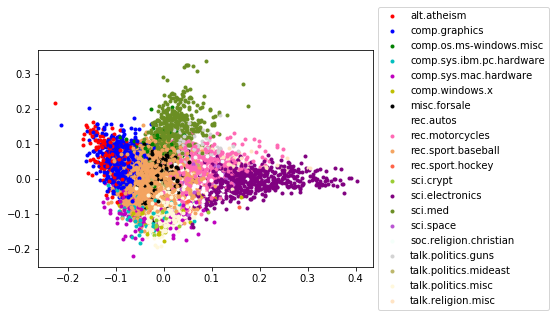

In [21]:
target_svd = clf_s.labels_

for n in range(0,18846):

    if target_svd[n] == 0:
        c1 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='r',
    marker='.')
    elif target_svd[n] == 1:
        c2 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='b',
    marker='.')
    elif target_svd[n] == 2:
        c3 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='g',
    marker='.')
    elif target_svd[n] == 3:
        c4 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='c',
    marker='.')
    elif target_svd[n] == 4:
        c5 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='m',
    marker='.')
    elif target_svd[n] == 5:
        c6 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='y',
    marker='.')
    elif target_svd[n] == 6:
        c7 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='k',
    marker='.')
    elif target_svd[n] == 7:
        c8 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='w',
    marker='.')
    elif target_svd[n] == 8:
        c9 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='hotpink',
    marker='.')
    elif target_svd[n] == 9:
        c10 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='sandybrown',
    marker='.')
    elif target_svd[n] == 10:
        c11 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='tomato',
    marker='.')
    elif target_svd[n] == 11:
        c12 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='yellowgreen',
    marker='.')
    elif target_svd[n] == 12:
        c13 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='purple',
    marker='.')
    elif target_svd[n] == 13:
        c14 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='olivedrab',
    marker='.')
    elif target_svd[n] == 14:
        c15 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='mediumorchid',
    marker='.')
    elif target_svd[n] == 15:
        c16 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='mintcream',
    marker='.')
    elif target_svd[n] == 16:
        c17 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='lightgray',
    marker='.')
    elif target_svd[n] == 17:
        c18 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='darkkhaki',
    marker='.')
    elif target_svd[n] == 18:
        c19 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='cornsilk',
    marker='.')
    elif target_svd[n] == 19:
        c20 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='bisque',
    marker='.')
plt.legend([c1, c2, c3,c4, c5, c6,c7, c8, c9,c10, c11, c12,c13, c14, c15,c16, c17, c18,c19, c20],['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(10,10))
plt.show()

## B

In [93]:
#nmf norm

In [24]:
from sklearn.preprocessing import StandardScaler
model_nmf = NMF(n_components=20, init='random', random_state=0)
X_train_nmf = model_nmf.fit_transform(X_train_tfidf)
norm = StandardScaler(with_mean = 'false')
X_train_nf = norm.fit_transform(X_train_nmf)

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import v_measure_score

In [22]:

from sklearn.decomposition import NMF
nmf_g = np.zeros([1,5])
labels = twenty_train.target
def nmf_func_norm():
    clf = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_nf)
    nmf_g[0,0]=homogeneity_score(labels, clf.labels_)
    nmf_g[0,1]=completeness_score(labels, clf.labels_)
    nmf_g[0,2]=v_measure_score(labels, clf.labels_)
    nmf_g[0,3]=adjusted_mutual_info_score(labels, clf.labels_)
    nmf_g[0,4]=adjusted_rand_score(labels, clf.labels_)
    print("Homogeneity: %0.3f" % nmf_g[0,0])
    print("Completeness: %0.3f" % nmf_g[0,1])
    print("V-measure: %0.3f" % nmf_g[0,2])
    print("Adjusted_Mutual_info_score: %0.3f" % nmf_g[0,3])
    print("Adjusted Rand-Index: %.3f"
      % nmf_g[0,4])
    print  'confusion matrix:' 
    print   confusion_matrix(labels, clf.labels_)
    print "_________________________________________"

In [25]:
nmf_func_norm()

Homogeneity: 0.297
Completeness: 0.379
V-measure: 0.333
Adjusted_Mutual_info_score: 0.294
Adjusted Rand-Index: 0.088
confusion matrix:
[[ 73 126   0   0   0   0   0   2 278   0   1   2   0   1 151   1  19 137
    0   8]
 [ 80 123   0   0   0   0   2  16 383   0   2   1   0   0   1   3   0   0
  308  54]
 [ 35  70  10   0   0   0   2   2 185   0  12   0   0   0   0   0   0   0
  609  60]
 [ 29 177 190   0   0   2   4   9 298   0   4   0   0   0   0   3   0   0
  209  57]
 [ 24 133  74   0   0   0  15   9 549   0   1   0   0   0   0   3   0   0
   98  57]
 [ 85 166   0   0   0   0   2  27 259   0   2   0   0   4   0   0   0   0
  419  24]
 [  5 136  53   0   0  14  34   4 567   0   8   3   0   0   0  63   0   0
   52  36]
 [ 19 161   0   0   0   0  27  10 205   0   0   3   0   0   0 524   4   0
    3  34]
 [ 82 315   0   0   0   0   6  15 217   0   1   0   0   0   0 236   0   0
    0 124]
 [  2 151   0   0   0 388   7   4 389   0   1   4   0   0   0   0   2   0
    0  46]
 [  2  44   0  

In [26]:
from sklearn.decomposition import PCA
X_nmf_norm = X_train_nf
pca = PCA(n_components=2).fit(X_nmf_norm)
X_nmf_2d = pca.transform(X_nmf_norm)

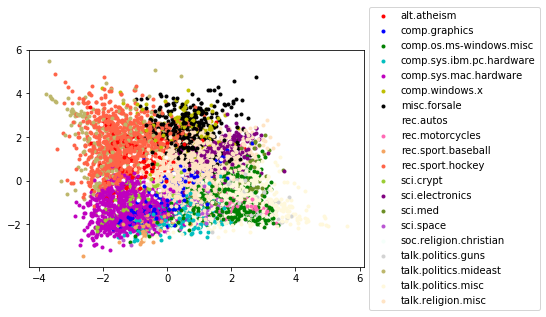

In [92]:
target_nmf = clf.labels_
for n in range(0,18846):
    if target_nmf[n] == 0:
        c1 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='r',
    marker='.')
    elif target_nmf[n] == 1:
        c2 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='b',
    marker='.')
    elif target_nmf[n] == 2:
        c3 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='g',
    marker='.')
    elif target_nmf[n] == 3:
        c4 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='c',
    marker='.')
    elif target_nmf[n] == 4:
        c5 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='m',
    marker='.')
    elif target_nmf[n] == 5:
        c6 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='y',
    marker='.')
    elif target_nmf[n] == 6:
        c7 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='k',
    marker='.')
    elif target_nmf[n] == 7:
        c8 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='w',
    marker='.')
    elif target_nmf[n] == 8:
        c9 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='hotpink',
    marker='.')
    elif target_nmf[n] == 9:
        c10 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='sandybrown',
    marker='.')
    elif target_nmf[n] == 10:
        c11 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='tomato',
    marker='.')
    elif target_nmf[n] == 11:
        c12 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='yellowgreen',
    marker='.')
    elif target_nmf[n] == 12:
        c13 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='purple',
    marker='.')
    elif target_nmf[n] == 13:
        c14 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='olivedrab',
    marker='.')
    elif target_nmf[n] == 14:
        c15 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='mediumorchid',
    marker='.')
    elif target_nmf[n] == 15:
        c16 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='mintcream',
    marker='.')
    elif target_nmf[n] == 16:
        c17 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='lightgray',
    marker='.')
    elif target_nmf[n] == 17:
        c18 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='darkkhaki',
    marker='.')
    elif target_nmf[n] == 18:
        c19 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='cornsilk',
    marker='.')
    elif target_nmf[n] == 19:
        c20 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='bisque',
    marker='.')
plt.legend([c1, c2, c3,c4, c5, c6,c7, c8, c9,c10, c11, c12,c13, c14, c15,c16, c17, c18,c19, c20],['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
# svd norm

In [31]:
from sklearn.decomposition import TruncatedSVD
SVD_g = np.zeros([1,5])
def lsi_func_norm():
    svd = TruncatedSVD(n_components=100, n_iter=5, random_state=42)
    X_train_svd=svd.fit_transform(X_train_tfidf)
    X_train_norm = norm.fit_transform(X_train_svd)
    clf = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_norm)
    SVD_g[0,0]=homogeneity_score(labels, clf.labels_)
    SVD_g[0,1]=completeness_score(labels, clf.labels_)
    SVD_g[0,2]=v_measure_score(labels, clf.labels_)
    SVD_g[0,3]=adjusted_mutual_info_score(labels, clf.labels_)
    SVD_g[0,4]=adjusted_rand_score(labels, clf.labels_)
    print("Homogeneity: %0.3f" % SVD_g[0,0])
    print("Completeness: %0.3f" % SVD_g[0,1])
    print("V-measure: %0.3f" % SVD_g[0,2])
    print("Adjusted_Mutual_info_score: %0.3f" % SVD_g[0,3])
    print("Adjusted Rand-Index: %.3f"
      % SVD_g[0,4])
    print  'confusion matrix:' 
    print   confusion_matrix(labels, clf.labels_)
    print "_________________________________________"
    return X_train_norm
    

In [32]:
X_train_norm = lsi_func_norm()

Homogeneity: 0.257
Completeness: 0.404
V-measure: 0.314
Adjusted_Mutual_info_score: 0.255
Adjusted Rand-Index: 0.072
confusion matrix:
[[139   2   0 153   0   0   0   0   4 125   0   0  27 306   0   2   0   0
   41   0]
 [  0  75   1  72   0   4   8   0   1  11   0   0  19 779   0   1   2   0
    0   0]
 [  0 178   0 336   0  12   0   1   2  10   0   0  19 423   2   0   2   0
    0   0]
 [  0 245   0 182   0   2   0   0   0  58   0   0   8 484   0   0   3   0
    0   0]
 [  0 116   0 168   0   8   0   1   0  33   0   0  21 602   0   0  14   0
    0   0]
 [  0 383   0  66   0   0  19   3   0   3   0   0   3 509   0   0   2   0
    0   0]
 [  0  55   0 102   4  10   0   3   1  30   0   0   6 726   0   5  33   0
    0   0]
 [  0  40   2 153   0   9   0  21   7  11   0   0  47 666   0   3  31   0
    0   0]
 [  0  22   0  18   0   6   0 670   3  13   0   0   8 250   0   0   6   0
    0   0]
 [  0  32   0  29  28  13   0   0   0 564   0   0  29 288   0   4   7   0
    0   0]
 [  0   6   0  

In [33]:
from sklearn.decomposition import PCA
X_svd = X_train_norm
pca = PCA(n_components=2).fit(X_svd)
X_svd_2d = pca.transform(X_svd)

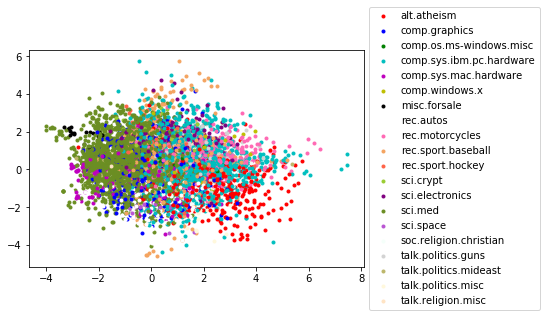

In [36]:
clf = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_norm)
target_svd = clf.labels_
for n in range(0,18846):
    if target_svd[n] == 0:
        c1 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='r',
    marker='.')
    elif target_svd[n] == 1:
        c2 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='b',
    marker='.')
    elif target_svd[n] == 2:
        c3 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='g',
    marker='.')
    elif target_svd[n] == 3:
        c4 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='c',
    marker='.')
    elif target_svd[n] == 4:
        c5 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='m',
    marker='.')
    elif target_svd[n] == 5:
        c6 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='y',
    marker='.')
    elif target_svd[n] == 6:
        c7 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='k',
    marker='.')
    elif target_svd[n] == 7:
        c8 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='w',
    marker='.')
    elif target_svd[n] == 8:
        c9 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='hotpink',
    marker='.')
    elif target_svd[n] == 9:
        c10 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='sandybrown',
    marker='.')
    elif target_svd[n] == 10:
        c11 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='tomato',
    marker='.')
    elif target_svd[n] == 11:
        c12 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='yellowgreen',
    marker='.')
    elif target_svd[n] == 12:
        c13 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='purple',
    marker='.')
    elif target_svd[n] == 13:
        c14 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='olivedrab',
    marker='.')
    elif target_svd[n] == 14:
        c15 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='mediumorchid',
    marker='.')
    elif target_svd[n] == 15:
        c16 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='mintcream',
    marker='.')
    elif target_svd[n] == 16:
        c17 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='lightgray',
    marker='.')
    elif target_svd[n] == 17:
        c18 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='darkkhaki',
    marker='.')
    elif target_svd[n] == 18:
        c19 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='cornsilk',
    marker='.')
    elif target_svd[n] == 19:
        c20 = plt.scatter(X_svd_2d[n,0],X_svd_2d[n,1],c='bisque',
    marker='.')
plt.legend([c1, c2, c3,c4, c5, c6,c7, c8, c9,c10, c11, c12,c13, c14, c15,c16, c17, c18,c19, c20],['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
# nmf log

In [37]:

nmf_g = np.zeros([1,5])
labels = twenty_train.target
def nmf_func_log():
    model_nmf = NMF(n_components=20, init='random', random_state=0)
    X_train_nmf = model_nmf.fit_transform(X_train_tfidf)
    X_train_log = np.log(X_train_nmf+0.01)
    clf = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_log)
    nmf_g[0,0]=homogeneity_score(labels, clf.labels_)
    nmf_g[0,1]=completeness_score(labels, clf.labels_)
    nmf_g[0,2]=v_measure_score(labels, clf.labels_)
    nmf_g[0,3]=adjusted_mutual_info_score(labels, clf.labels_)
    nmf_g[0,4]=adjusted_rand_score(labels, clf.labels_)
    print("Homogeneity: %0.3f" % nmf_g[0,0])
    print("Completeness: %0.3f" % nmf_g[0,1])
    print("V-measure: %0.3f" % nmf_g[0,2])
    print("Adjusted_Mutual_info_score: %0.3f" % nmf_g[0,3])
    print("Adjusted Rand-Index: %.3f"
      % nmf_g[0,4])
    print  'confusion matrix:' 
    print   confusion_matrix(labels, clf.labels_)
    print "_________________________________________"
    return X_train_log

In [38]:
X_train_log = nmf_func_log()

Homogeneity: 0.390
Completeness: 0.430
V-measure: 0.409
Adjusted_Mutual_info_score: 0.388
Adjusted Rand-Index: 0.215
confusion matrix:
[[279   1   1   4   1 256   0   0   2   0  73  76   1   6  39   3   3  50
    0   4]
 [  1   3   0   1   2  13   5   1   1 466 108 176   1  51   3   9   0 105
    3  24]
 [  0   2   0   0   1   1  20   0   0 694  47  61   0  61   3  32   0  55
    3   5]
 [  0  15   2   0   3   4 322   0   0 282  41 109   0  58   0  16   0  93
   19  18]
 [  0  19   1   1   2   2 178   2   0 186  35 319   0  67   1  13   0  99
   23  15]
 [  0   0   0   0   8   3   1   0   0 580 113 110   0  27   0   6   0 105
    4  31]
 [  1 110  19   0   1   2 115   1   7  79   6 391   0  50   3  34   0 109
   44   3]
 [  0 643   0   0   0   6   1   0   4   3  28 104   0  37  18   4   0  87
   36  19]
 [  6 408   0   0   0   5   6   0   0   0 101 110   0 130  21   5   0 172
   12  20]
 [  1  10 552   3   0  18   0   2   5   0   3 213   0  53   7   8   0 103
    9   7]
 [  0   1 674  

In [39]:
from sklearn.decomposition import PCA
X_nmf_log = X_train_log
pca = PCA(n_components=2).fit(X_nmf_norm)
X_nmf_2d = pca.transform(X_nmf_norm)

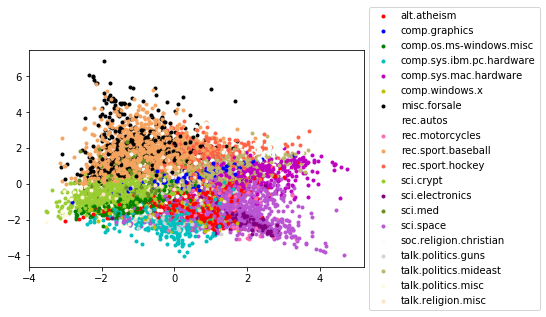

In [40]:
clf = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_log)
target_nmf = clf.labels_
for n in range(0,18846):
    if target_nmf[n] == 0:
        c1 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='r',
    marker='.')
    elif target_nmf[n] == 1:
        c2 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='b',
    marker='.')
    elif target_nmf[n] == 2:
        c3 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='g',
    marker='.')
    elif target_nmf[n] == 3:
        c4 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='c',
    marker='.')
    elif target_nmf[n] == 4:
        c5 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='m',
    marker='.')
    elif target_nmf[n] == 5:
        c6 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='y',
    marker='.')
    elif target_nmf[n] == 6:
        c7 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='k',
    marker='.')
    elif target_nmf[n] == 7:
        c8 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='w',
    marker='.')
    elif target_nmf[n] == 8:
        c9 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='hotpink',
    marker='.')
    elif target_nmf[n] == 9:
        c10 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='sandybrown',
    marker='.')
    elif target_nmf[n] == 10:
        c11 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='tomato',
    marker='.')
    elif target_nmf[n] == 11:
        c12 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='yellowgreen',
    marker='.')
    elif target_nmf[n] == 12:
        c13 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='purple',
    marker='.')
    elif target_nmf[n] == 13:
        c14 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='olivedrab',
    marker='.')
    elif target_nmf[n] == 14:
        c15 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='mediumorchid',
    marker='.')
    elif target_nmf[n] == 15:
        c16 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='mintcream',
    marker='.')
    elif target_nmf[n] == 16:
        c17 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='lightgray',
    marker='.')
    elif target_nmf[n] == 17:
        c18 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='darkkhaki',
    marker='.')
    elif target_nmf[n] == 18:
        c19 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='cornsilk',
    marker='.')
    elif target_nmf[n] == 19:
        c20 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='bisque',
    marker='.')
plt.legend([c1, c2, c3,c4, c5, c6,c7, c8, c9,c10, c11, c12,c13, c14, c15,c16, c17, c18,c19, c20],['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
# nmf log norm

In [49]:
from sklearn.preprocessing import StandardScaler
nmf_g = np.zeros([1,5])
labels = twenty_train.target
def nmf_func_log_norm():
    model_nmf = NMF(n_components=20, init='random', random_state=0)
    X_train_nmf = model_nmf.fit_transform(X_train_tfidf)
    X_train_log = np.log(X_train_nmf+0.01)
    norm = StandardScaler(with_mean = 'false')
    X_train_nf = norm.fit_transform(X_train_log)
    clf = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_nf)
    nmf_g[0,0]=homogeneity_score(labels, clf.labels_)
    nmf_g[0,1]=completeness_score(labels, clf.labels_)
    nmf_g[0,2]=v_measure_score(labels, clf.labels_)
    nmf_g[0,3]=adjusted_mutual_info_score(labels, clf.labels_)
    nmf_g[0,4]=adjusted_rand_score(labels, clf.labels_)
    print("Homogeneity: %0.3f" % nmf_g[0,0])
    print("Completeness: %0.3f" % nmf_g[0,1])
    print("V-measure: %0.3f" % nmf_g[0,2])
    print("Adjusted_Mutual_info_score: %0.3f" % nmf_g[0,3])
    print("Adjusted Rand-Index: %.3f"
      % nmf_g[0,4])
    print  'confusion matrix:' 
    print   confusion_matrix(labels, clf.labels_)
    print "_________________________________________"
    return X_train_nf

In [45]:
X_train_nf = nmf_func_log_norm()

Homogeneity: 0.383
Completeness: 0.418
V-measure: 0.400
Adjusted_Mutual_info_score: 0.381
Adjusted Rand-Index: 0.211
confusion matrix:
[[  5   0  58  36  68   1 253   0   3   8   6  73   2   1   4 277   1   1
    1   1]
 [  3 418 103   3 192   4   1   7  12  61  30 109   1   0   0  20   2   1
    1   5]
 [  0 619  53   4  95   4   0  32  37  79   5  51   0   0   0   1   1   0
    0   4]
 [  0 225 106   0 110  16   0 360  12  55  20  36   0   2   0   5   6   3
    0  26]
 [  1 145  88   1 318  24   0 212  12  67  14  37   0   1   0   8   3   3
    0  29]
 [  0 524 125   0 122   1   0   1   7  35  33 116   0   0   0   4  13   0
    0   7]
 [  0  66  98   3 397 106   1 126  33  50   4   6   7  21   0   3   1   2
    0  51]
 [  0   3  93  14 108 620   0   1   4  42  22  30   7   0   0   6   0   0
    0  40]
 [  0   0 193  17 109 388   6   7   5 130  21 101   0   0   0   6   0   0
    0  13]
 [  3   0 100   4 200   7   0   0   7  47   8   3   5 572   0  21   0   8
    0   9]
 [  0   0  27  

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train_nf)
X_nmf_2d = pca.transform(X_train_nf)

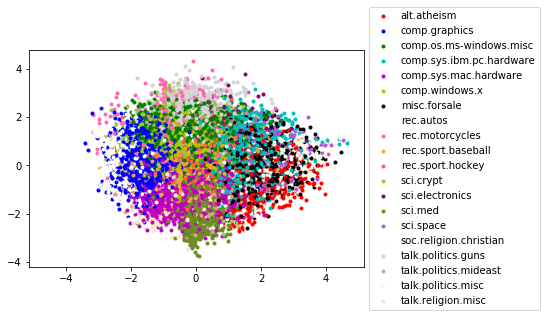

In [53]:
clf = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_nf)
target_nmf = clf.labels_
for n in range(0,18846):
    if target_nmf[n] == 0:
        c1 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='r',
    marker='.')
    elif target_nmf[n] == 1:
        c2 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='b',
    marker='.')
    elif target_nmf[n] == 2:
        c3 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='g',
    marker='.')
    elif target_nmf[n] == 3:
        c4 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='c',
    marker='.')
    elif target_nmf[n] == 4:
        c5 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='m',
    marker='.')
    elif target_nmf[n] == 5:
        c6 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='y',
    marker='.')
    elif target_nmf[n] == 6:
        c7 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='k',
    marker='.')
    elif target_nmf[n] == 7:
        c8 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='w',
    marker='.')
    elif target_nmf[n] == 8:
        c9 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='hotpink',
    marker='.')
    elif target_nmf[n] == 9:
        c10 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='sandybrown',
    marker='.')
    elif target_nmf[n] == 10:
        c11 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='tomato',
    marker='.')
    elif target_nmf[n] == 11:
        c12 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='yellowgreen',
    marker='.')
    elif target_nmf[n] == 12:
        c13 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='purple',
    marker='.')
    elif target_nmf[n] == 13:
        c14 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='olivedrab',
    marker='.')
    elif target_nmf[n] == 14:
        c15 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='mediumorchid',
    marker='.')
    elif target_nmf[n] == 15:
        c16 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='mintcream',
    marker='.')
    elif target_nmf[n] == 16:
        c17 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='lightgray',
    marker='.')
    elif target_nmf[n] == 17:
        c18 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='darkkhaki',
    marker='.')
    elif target_nmf[n] == 18:
        c19 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='cornsilk',
    marker='.')
    elif target_nmf[n] == 19:
        c20 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='bisque',
    marker='.')
plt.legend([c1, c2, c3,c4, c5, c6,c7, c8, c9,c10, c11, c12,c13, c14, c15,c16, c17, c18,c19, c20],['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
# nmf norm log

In [90]:
from sklearn.preprocessing import StandardScaler
nmf_g = np.zeros([1,5])
labels = twenty_train.target
def nmf_func_norm_log():
    model_nmf = NMF(n_components=20, init='random', random_state=0)
    X_train_nmf = model_nmf.fit_transform(X_train_tfidf)
    
    norm = StandardScaler()
    X_train_nf = norm.fit_transform(X_train_nmf)
    
    X_train_log = np.log(X_train_nf-np.amin(X_train_nf)+1)
    clf = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_log)
    nmf_g[0,0]=homogeneity_score(labels, clf.labels_)
    nmf_g[0,1]=completeness_score(labels, clf.labels_)
    nmf_g[0,2]=v_measure_score(labels, clf.labels_)
    nmf_g[0,3]=adjusted_mutual_info_score(labels, clf.labels_)
    nmf_g[0,4]=adjusted_rand_score(labels, clf.labels_)
    print("Homogeneity: %0.3f" % nmf_g[0,0])
    print("Completeness: %0.3f" % nmf_g[0,1])
    print("V-measure: %0.3f" % nmf_g[0,2])
    print("Adjusted_Mutual_info_score: %0.3f" % nmf_g[0,3])
    print("Adjusted Rand-Index: %.3f"
      % nmf_g[0,4])
    print  'confusion matrix:' 
    print   confusion_matrix(labels, clf.labels_)
    print "_________________________________________"
    return X_train_log, X_train_nf

In [91]:
X_train_log, X_train_nf = nmf_func_norm_log()

Homogeneity: 0.340
Completeness: 0.382
V-measure: 0.359
Adjusted_Mutual_info_score: 0.338
Adjusted Rand-Index: 0.160
confusion matrix:
[[  9 213   0   2   1  28   1   1  83   4 141   2  76  56   0 180   0   1
    1   0]
 [ 60   1   2   0   8   2 408   0  31  19 231   0  96 103   0   7   2   2
    1   0]
 [ 67   0  20   0   2   1 629   0  20   4 118   0  39  65   0   0   2  17
    1   0]
 [ 57   0 256   0  15   0 245   3  28  19 155   0  31 149   0   2  13   8
    1   0]
 [ 61   0 132   0  24   0 173   1  44  13 369   0  32  94   0   1  17   2
    0   0]
 [ 32   0   0   0   2   0 493   0  41  30 134   0 110 131   0   2   2   2
    9   0]
 [ 36   0  82   0 115   0  70  18  27   4 454   0   5 116   0   0  37  11
    0   0]
 [ 36   0   1   0 567   8   2   0  46  16 137   0  20 119   0   3  34   1
    0   0]
 [126   0   3   0 321   5   0   0  84  18 134   0  81 215   0   0   8   1
    0   0]
 [ 47   0   0   0   8   2   0 477  84   5 255   0   2  99   0   6   8   1
    0   0]
 [178   0   0  

In [92]:
X_train_nf

array([[-0.49427578, -0.21970051, -0.29033423, ..., -0.53517946,
        -0.16872527, -0.23628174],
       [-0.49427578, -0.17459595, -0.29033423, ...,  1.27152054,
        -0.16872527, -0.23628174],
       [ 0.67989898, -0.15768269, -0.25632884, ..., -0.39049557,
         7.61352213, -0.23628174],
       ..., 
       [-0.49427578, -0.21970051,  0.06173091, ..., -0.13965848,
        -0.16872527, -0.23628174],
       [-0.23957915,  0.22344914, -0.10962243, ..., -0.09592579,
        -0.16872527,  0.16962378],
       [-0.48127098, -0.05194866, -0.29033423, ..., -0.48971228,
        -0.16872527, -0.23628174]])

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train_log)
X_nmf_2d = pca.transform(X_train_log)

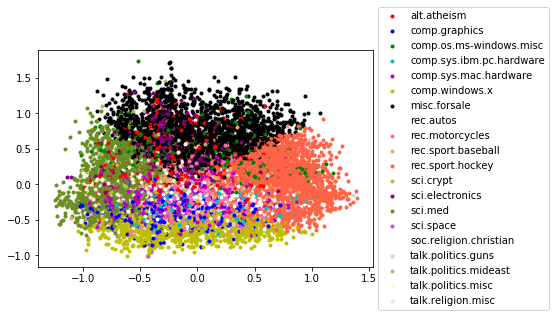

In [94]:
clf = KMeans(n_clusters=20,random_state=0, max_iter=500, n_init=50).fit(X_train_log)
target_nmf = clf.labels_
for n in range(0,18846):
    if target_nmf[n] == 0:
        c1 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='r',
    marker='.')
    elif target_nmf[n] == 1:
        c2 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='b',
    marker='.')
    elif target_nmf[n] == 2:
        c3 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='g',
    marker='.')
    elif target_nmf[n] == 3:
        c4 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='c',
    marker='.')
    elif target_nmf[n] == 4:
        c5 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='m',
    marker='.')
    elif target_nmf[n] == 5:
        c6 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='y',
    marker='.')
    elif target_nmf[n] == 6:
        c7 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='k',
    marker='.')
    elif target_nmf[n] == 7:
        c8 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='w',
    marker='.')
    elif target_nmf[n] == 8:
        c9 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='hotpink',
    marker='.')
    elif target_nmf[n] == 9:
        c10 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='sandybrown',
    marker='.')
    elif target_nmf[n] == 10:
        c11 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='tomato',
    marker='.')
    elif target_nmf[n] == 11:
        c12 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='yellowgreen',
    marker='.')
    elif target_nmf[n] == 12:
        c13 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='purple',
    marker='.')
    elif target_nmf[n] == 13:
        c14 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='olivedrab',
    marker='.')
    elif target_nmf[n] == 14:
        c15 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='mediumorchid',
    marker='.')
    elif target_nmf[n] == 15:
        c16 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='mintcream',
    marker='.')
    elif target_nmf[n] == 16:
        c17 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='lightgray',
    marker='.')
    elif target_nmf[n] == 17:
        c18 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='darkkhaki',
    marker='.')
    elif target_nmf[n] == 18:
        c19 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='cornsilk',
    marker='.')
    elif target_nmf[n] == 19:
        c20 = plt.scatter(X_nmf_2d[n,0],X_nmf_2d[n,1],c='bisque',
    marker='.')
plt.legend([c1, c2, c3,c4, c5, c6,c7, c8, c9,c10, c11, c12,c13, c14, c15,c16, c17, c18,c19, c20],['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(10,10))
plt.show()